In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KernelDensity
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KernelDensity

In [2]:
# Load train and test data 

pathway = "/lfs1/pjtoral/cognitive-decline/scripts/data/revised/standardized/mci_included"
df_train_ADNI1 = pd.read_csv(pathway + "/train_ADNI1_9DOF.csv")
df_train_ADNI2 = pd.read_csv(pathway + "/train_ADNI2_9DOF.csv")
df_train_ADNI3 = pd.read_csv(pathway + "/train_ADNI3_9DOF.csv")
df_train = pd.concat([df_train_ADNI1, df_train_ADNI2, df_train_ADNI3], ignore_index=True).reset_index(drop=True)


df_test_ADNI1 = pd.read_csv(pathway + "/test_ADNI1_9DOF.csv")
df_test_ADNI2 = pd.read_csv(pathway + "/test_ADNI2_9DOF.csv")
df_test_ADNI3 = pd.read_csv(pathway + "/test_ADNI3_9DOF.csv")
df_test = pd.concat([df_test_ADNI1, df_test_ADNI2, df_test_ADNI3], ignore_index=True).reset_index(drop=True)

df = pd.concat([df_train_ADNI1, df_train_ADNI2, df_train_ADNI3,df_test_ADNI1, df_test_ADNI2, df_test_ADNI3],ignore_index=True).reset_index(drop=True)
# Remove NaN values
df_test = df_test.dropna(subset=['MMSE'])
# Remove infinite values
df_test = df_test[np.isfinite(df_test['MMSE'])]

# Remove NaN values
df_train = df_train.dropna(subset=['MMSE'])
# Remove infinite values
df_train = df_train[np.isfinite(df_train['MMSE'])]

# Remove NaN values
df = df.dropna(subset=['MMSE'])
# Remove infinite values
df = df[np.isfinite(df['MMSE'])]


dataset = df_train[['MMSE']].values
dataset_sorted = df_train[['MMSE']].sort_values("MMSE").values

dataset_test = df_test[['MMSE']].values
dataset_test_sorted = df_test[['MMSE']].sort_values("MMSE").values

In [3]:
def plot_data_details(dataset,title,ax):
    mean = np.mean(dataset)
    median = np.median(dataset.values)
    std_dev = np.std(dataset)
    ax.hist(dataset, bins=5, density=True, color='lightblue', label='5-Bin Histogram')
    ax.axvline(mean, color='red', linestyle='dotted', linewidth=1,label=f'Mean: {mean:.2f}')
    # plt.axvline(median, color='green', linestyle='dotted', linewidth=1, label=f'Median: {median:.2f}')
    ax.axvline(mean + std_dev, color='purple', linestyle='dotted', linewidth=1, label=f'Standard Deviation: {std_dev:.2f}')
    ax.axvline(mean - std_dev, color='purple', linestyle='dotted', linewidth=1)

    ax.set_xlabel('Cognitive Assessment (MMSE) Raw Values')
    ax.set_ylabel('Number of Examples: '+str(dataset.shape[0]))
    ax.set_title(title)
    ax.legend(loc="center left")

In [4]:
def plot_data_distribution(dataset,title,ax):
    size = len(dataset)
    kde_g = KernelDensity(kernel='tophat', bandwidth=0.2)
    kde_g.fit(dataset)
    x_range = np.linspace(dataset.min()-0.3, dataset.max()+0.3, num=size)
    # compute the log-likelihood of each sample
    log_density = kde_g.score_samples(dataset_sorted)
    density = np.exp(log_density)

    weights = (2 - density)**2
    # weights = weights / np.sum(weights)
    # print(weights)
    # plt.plot(dataset_sorted, weights,color='Red',alpha=0.8,label='Sample Weights')
    # Add vertical lines for mean, median, and standard deviation

    # draw KDE curve
    # plt.plot(dataset_sorted, density,color='gray',alpha=0.8,label='Gaussian KDE for Sample Weighting')
    # plt.hist(df_train['MMSE'], bins=5, density=True, alpha=0.5, color='lightblue', label='MMSE 5-Bin Histogram')
    sns.kdeplot(dataset, bw_method=0.4, label='KDE Plot',alpha=0.5, fill=True,ax=ax,color="lightblue")
        
    # plt.axvline(mean, color='red', linestyle='dotted', linewidth=1, ymax=0.5, label=f'Mean: {mean:.2f}')
    # plt.axvline(median, color='green', linestyle='dotted', linewidth=1, ymax=0.5, label=f'Median: {median:.2f}')
    # plt.axvline(mean + std_dev, color='purple', linestyle='dotted', linewidth=1, ymax=0.5, label=f'Standard Deviation: {std_dev:.2f}')
    # plt.axvline(mean - std_dev, color='purple', linestyle='dotted', linewidth=1, ymax=0.5)
    ax.plot(dataset_sorted[:, 0], -0.005 - 0.01 * np.random.random(dataset_sorted.shape[0]),"+k",alpha=0.1, )
    # Add labels and title
    ax.set_xlabel('Cognitive Assessment (MMSE) Raw Values')
    ax.set_ylabel('Density')
    ax.set_title(title+' Distribution')
    ax.legend(loc="center left")
    
    

/nas/home/pjtoral/.conda/envs/pjt/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KernelDensity was fitted with feature names
  "X does not have valid feature names, but"


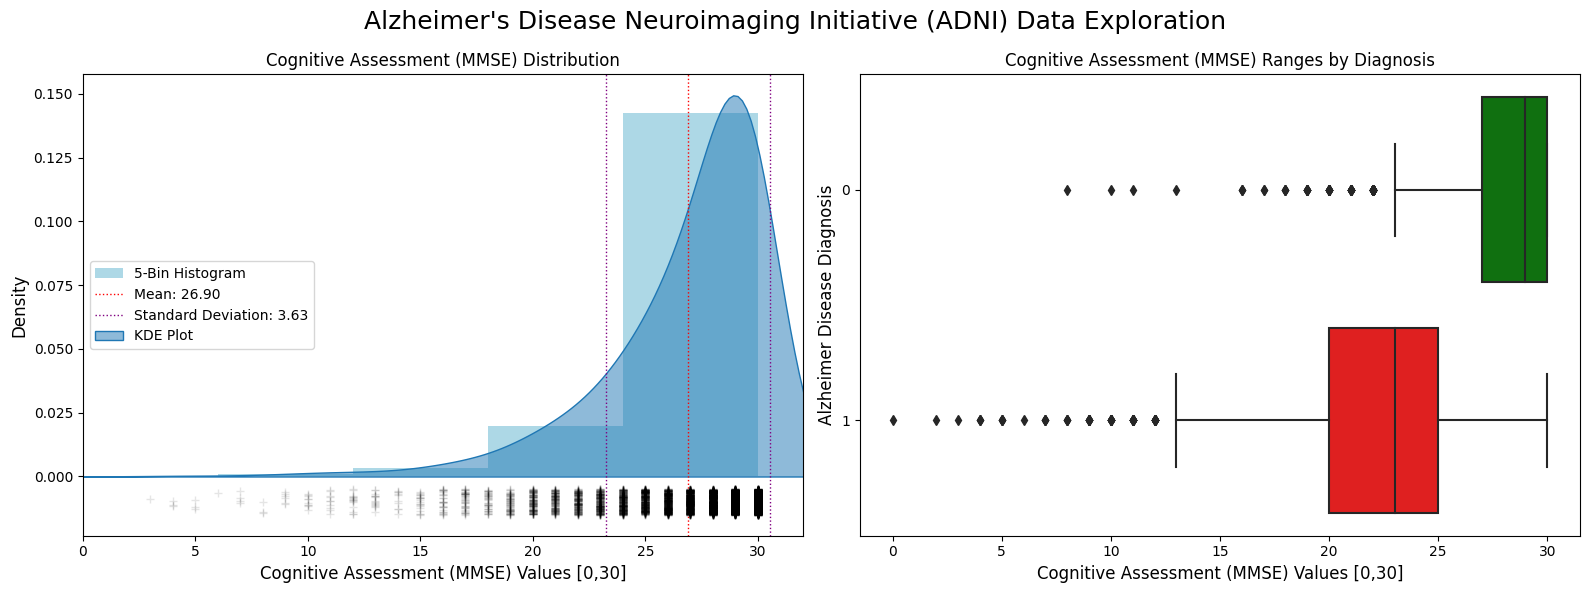

In [17]:
# Train Data
df = pd.concat([df_train, df_test],ignore_index=True).reset_index(drop=True)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
plot_data_details(df["MMSE"], "",axs[0])
plot_data_distribution(df[["MMSE"]],"Cognitive Assessment (MMSE)",axs[0])
sns.boxplot(data=df, x="MMSE", y="label",orient="h", ax=axs[1],palette=['g','r'])
axs[0].set_ylabel("Density", fontsize=12)
axs[1].set_ylabel("Alzheimer Disease Diagnosis", fontsize=12)
axs[1].set_xlabel("Cognitive Assessment (MMSE) Values [0,30]", fontsize=12)
axs[0].set_xlabel("Cognitive Assessment (MMSE) Values [0,30]", fontsize=12)
axs[0].set_xlim(0,32)
# print(axs[1].get_legend_handles_labels() )
# axs[1].legend(["Cognitively Normal or Mild Cognitive Impairment", "Alzheimers Diagnosis"]   )
axs[1].set_title("Cognitive Assessment (MMSE) Ranges by Diagnosis", fontsize=12)
plt.suptitle("Alzheimer's Disease Neuroimaging Initiative (ADNI) Data Exploration", fontsize=18)
plt.tight_layout()
plt.savefig('data_exploration.png')
plt.show()


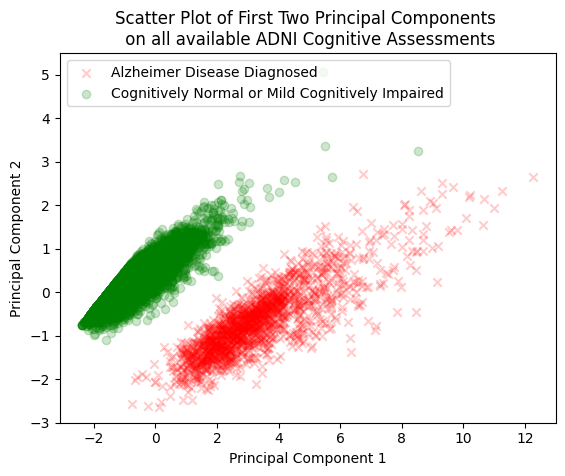

In [6]:
# Standardize the data
# df = df_train.copy()
df.dropna(subset=["MMSE","CDRSB","ADAS11","ADAS13","label"],inplace=True)
df = df[np.isfinite(df[["MMSE","CDRSB","ADAS11","ADAS13","label"]])]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[["MMSE","CDRSB","ADAS11","ADAS13","label"]])

dx = [False if val == 0 else True for val in df["label"]]
dx_false = [True if val == 0 else False for val in df["label"]]
# Perform PCA
n_components = 2
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)

# Plot the explained variance ratio for each principal component
# explained_variance_ratio = pca.explained_variance_ratio_
# plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
# plt.xlabel('Principal Component')
# plt.ylabel('Explained Variance Ratio')
# plt.title('Explained Variance Ratio for Each Principal Component')
# plt.show()

# Plot a scatter plot of the first two principal components
pc_true_x = principal_components[:, 0][dx]
pc_true_y = principal_components[:, 1][dx]

pc_false_x = principal_components[:, 0][dx_false]
pc_false_y = principal_components[:, 1][dx_false]

plt.scatter(pc_true_x, pc_true_y, c="r", marker='x',alpha=0.2,label="Alzheimer Disease Diagnosed")
plt.scatter(pc_false_x, pc_false_y, c="g", alpha=0.2,label="Cognitively Normal or Mild Cognitively Impaired")
# plt.scatter(x[mask], y[mask], c=color, label=f'Color {i + 1}')
plt.ylim(-3,5.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of First Two Principal Components \n on all available ADNI Cognitive Assessments', fontsize=12)
plt.legend(loc="upper left")
plt.savefig("pca.png")
plt.show()


In [7]:
# ADNI Descriptions
adni_total_sheet = pd.read_excel(
        "/nas/bioint-data/neuroimaging-data/ADNI/ADNI_all_T1_DLpaths_DWIpaths_demographics_20221027_shared.xlsx",
        engine="openpyxl")

In [8]:
print(adni_total_sheet["AGE_at_scan"].describe())

count    9592.000000
mean       74.941118
std         7.345416
min        55.100000
25%        70.100000
50%        75.000000
75%        80.200000
max        97.400000
Name: AGE_at_scan, dtype: float64


In [9]:
ukbb_total_sheet = pd.read_excel(
        "/nas/bioint-data/neuroimaging-data/UKBB/UKBB_all_T1_DLpaths_masterdemographics_20220207.xlsx",
        engine="openpyxl")

In [10]:
ukbb_total_sheet.columns

Index(['SubjID', '6DOF_1MM', '6DOF_norm_1MM', '6DOF_2MM', '6DOF_norm_2MM',
       '9DOF_1MM', '9DOF_norm_1MM', '9DOF_2MM', '9DOF_norm_2MM',
       'Sex_0 (0=F, 1=M)', 'Genetic_Sex_0  (0=F, 1=M)', 'AgeAtScan',
       'AgeAt2ndScan', 'Race', 'ISCED', 'YearsOfEducation',
       'Genetic_ethnic_grouping_0', 'Genetic_ethnic_grouping_1',
       'Genetic_ethnic_grouping_2', 'Genetic_ethnic_grouping_3',
       'Genetic_ethnic_grouping_4', 'Genetic_ethnic_grouping_5',
       'Genetic_ethnic_grouping_6', 'Genetic_ethnic_grouping_7',
       'Genetic_ethnic_grouping_8', 'Genetic_ethnic_grouping_9',
       'Genetic_ethnic_grouping_10', 'CNS_controls_1', 'CNS_controls_2',
       'NP_controls_1', 'NP_controls_2', 'Date_2', 'Date_3', 'Center_2',
       'Center_3', 'APOE_Status', 'ICD_Num_Codes', 'BMI_At_Scan_Body_Size',
       'BMI_At_Scan_Impedance',
       'Missing /ifs/loni/faculty/njahansh/datasets/UKBB/dataset/processed/T1w_DICOM_20216_2_0/BrainAge_Preproc_FS7.1.1/${subj}_20216_2_0_oriented_BF_ad

In [11]:
print(ukbb_total_sheet["AgeAtScan"].describe())

count    49001.000000
mean        64.691409
std          7.741027
min         44.583333
25%         58.666667
50%         65.250000
75%         70.750000
max         82.750000
Name: AgeAtScan, dtype: float64


In [12]:
ukbb_train = pd.read_csv("/lfs1/pjtoral/imbalanced-regression/data/classification/sex/df_ukbb_train.csv")
ukbb_test = pd.read_csv("/lfs1/pjtoral/imbalanced-regression/data/classification/sex/df_ukbb_test.csv")
ukbb_df = pd.concat([ukbb_train, ukbb_test],ignore_index=True).reset_index(drop=True)

In [13]:
ukbb_df[ukbb_df["label"] == 0].describe()


,Unnamed: 0,label,subj_id
count,5369.000000,5369.0,5.369000e+03
mean,3599.288694,0.0,3.405955e+06
std,2508.866244,0.0,1.305450e+06
min,0.000000,0.0,1.001910e+06
25%,1356.000000,0.0,2.428954e+06
50%,3185.000000,0.0,3.178224e+06
75%,5817.000000,0.0,4.547726e+06
max,8355.000000,0.0,6.017430e+06


In [14]:
ukbb_df[ukbb_df["label"] == 1].describe()

,Unnamed: 0,label,subj_id
count,4875.000000,4875.0,4.875000e+03
mean,3486.419897,1.0,3.434243e+06
std,2506.771302,0.0,1.307476e+06
min,1.000000,1.0,1.003345e+06
25%,1218.500000,1.0,2.429030e+06
50%,3048.000000,1.0,3.204696e+06
75%,5620.500000,1.0,4.580438e+06
max,8354.000000,1.0,6.018221e+06


In [15]:
ukbb_df[ukbb_df["label"] == 0].describe()

,Unnamed: 0,label,subj_id
count,5369.000000,5369.0,5.369000e+03
mean,3599.288694,0.0,3.405955e+06
std,2508.866244,0.0,1.305450e+06
min,0.000000,0.0,1.001910e+06
25%,1356.000000,0.0,2.428954e+06
50%,3185.000000,0.0,3.178224e+06
75%,5817.000000,0.0,4.547726e+06
max,8355.000000,0.0,6.017430e+06


Text(0.5, 1.0, 'UKBB Sex Classification Bar Graph')

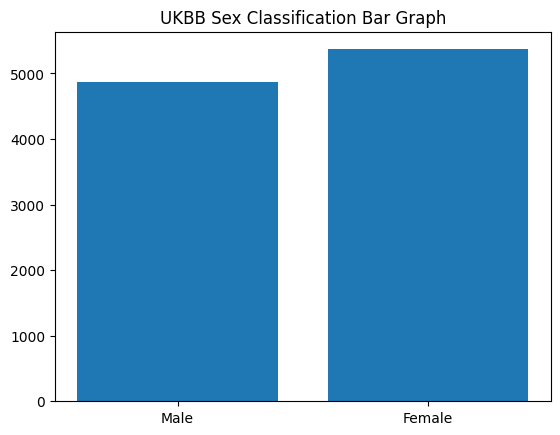

In [18]:
plt.bar(["Male","Female"], [len(ukbb_df[ukbb_df["label"]==1].values),len(ukbb_df[ukbb_df["label"]==0].values)])
plt.title("UKBB Sex Classification Bar Graph")